In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bpi_fr_algo_credit_scoring.conf import DATA_ROOT
from bpi_fr_algo_credit_scoring.reader import read_yearly_data, read_new_companies_data

In [2]:
# Import of dataset
default_risk_dataset = read_yearly_data(
    path=DATA_ROOT, 
    default_year=1
)

nb_companies, nb_variables = default_risk_dataset.shape
print(f'Total number of companies: {nb_companies}')
print(f'Total number of variables: {nb_variables}')

nb_default = np.sum(default_risk_dataset.query('Default == 1')['Default'])
print(f'Total companies where default occured: {nb_default}')

Total number of companies: 7027
Total number of variables: 65
Total companies where default occured: 271


In [3]:
# Study of NA values per variable
def nb_na(vector):
    return np.sum(pd.isna(vector))

nb_na_per_variable = (default_risk_dataset
.apply(nb_na, axis=0)
.sort_values(ascending=False)
)

In [4]:
# Deletion of features
print("------------------Number of NA values per variable------------------")
print("")
for line in range(0, len(nb_na_per_variable)):
    print(f'{nb_na_per_variable.index[line]}: {nb_na_per_variable[line]}')

features_deleted = nb_na_per_variable[0:2].index
print("")
print(f'Conclusion: We delete {" AND ".join(features_deleted)}')

default_risk_dataset_feat_filtered = (default_risk_dataset
.drop(features_deleted
.to_list(), axis=1)
)

------------------Number of NA values per variable------------------

(current assets - inventories) / long - term liabilities: 2740
sales(n) / sales(n - 1): 1622
profit on operating activities / financial expenses: 311
sales / inventory: 135
net profit / inventory: 134
gross profit( in 3 years) / total assets: 124
total liabilities / ((profit on operating activities + depreciation) * (12 / 365)): 84
(gross profit + extraordinary items + financial expenses) / total assets: 39
(current liabilities * 365) / cost of products sold: 38
working capital / fixed assets: 34
sales / fixed assets: 34
constant capital / fixed assets: 34
equity / fixed assets: 34
(current assets - inventory) / short - term liabilities: 31
operating expenses / short - term liabilities: 30
(current assets - inventory - receivables) / short - term liabilities: 30
sales / short - term liabilities: 30
current assets / short - term liabilities: 30
gross profit / short - term liabilities: 30
(short - term liabilities * 36

In [5]:
# Deletion of companies with 3 or more NA values (5% of total variables)
nb_na_per_company = default_risk_dataset_feat_filtered.apply(nb_na, axis=1).sort_values(ascending=False)
companies_deleted = nb_na_per_company[nb_na_per_company >= 3].index

print(f'Total number of deleted companies: {len(companies_deleted)}')
print(f'Total number of deleted companies where default occured deleted: {np.sum(default_risk_dataset_feat_filtered.loc[companies_deleted, "Default"])}')

default_risk_dataset_feat_company_filtered = default_risk_dataset_feat_filtered.drop(index=companies_deleted)

print("")
print("--------------Shape of new dataset-----------")
nb_companies_new_df, nb_variables_new_df = default_risk_dataset_feat_company_filtered.shape
print(f'Total number of companies: {nb_companies_new_df}')
print(f'Total number of variables: {nb_variables_new_df}')

Total number of deleted companies: 105
Total number of deleted companies where default occured deleted: 11

--------------Shape of new dataset-----------
Total number of companies: 6922
Total number of variables: 63


In [10]:
default_risk_dataset.loc[7026].to_clipboard()

In [21]:
# Replacing NA values per variables means
def fill_na_by_mean(vector):
    return vector.fillna(vector.mean())


default_risk_dataset_no_na_feat_company_filtered = default_risk_dataset_feat_company_filtered.apply(fill_na_by_mean, axis=0)

<Axes: >

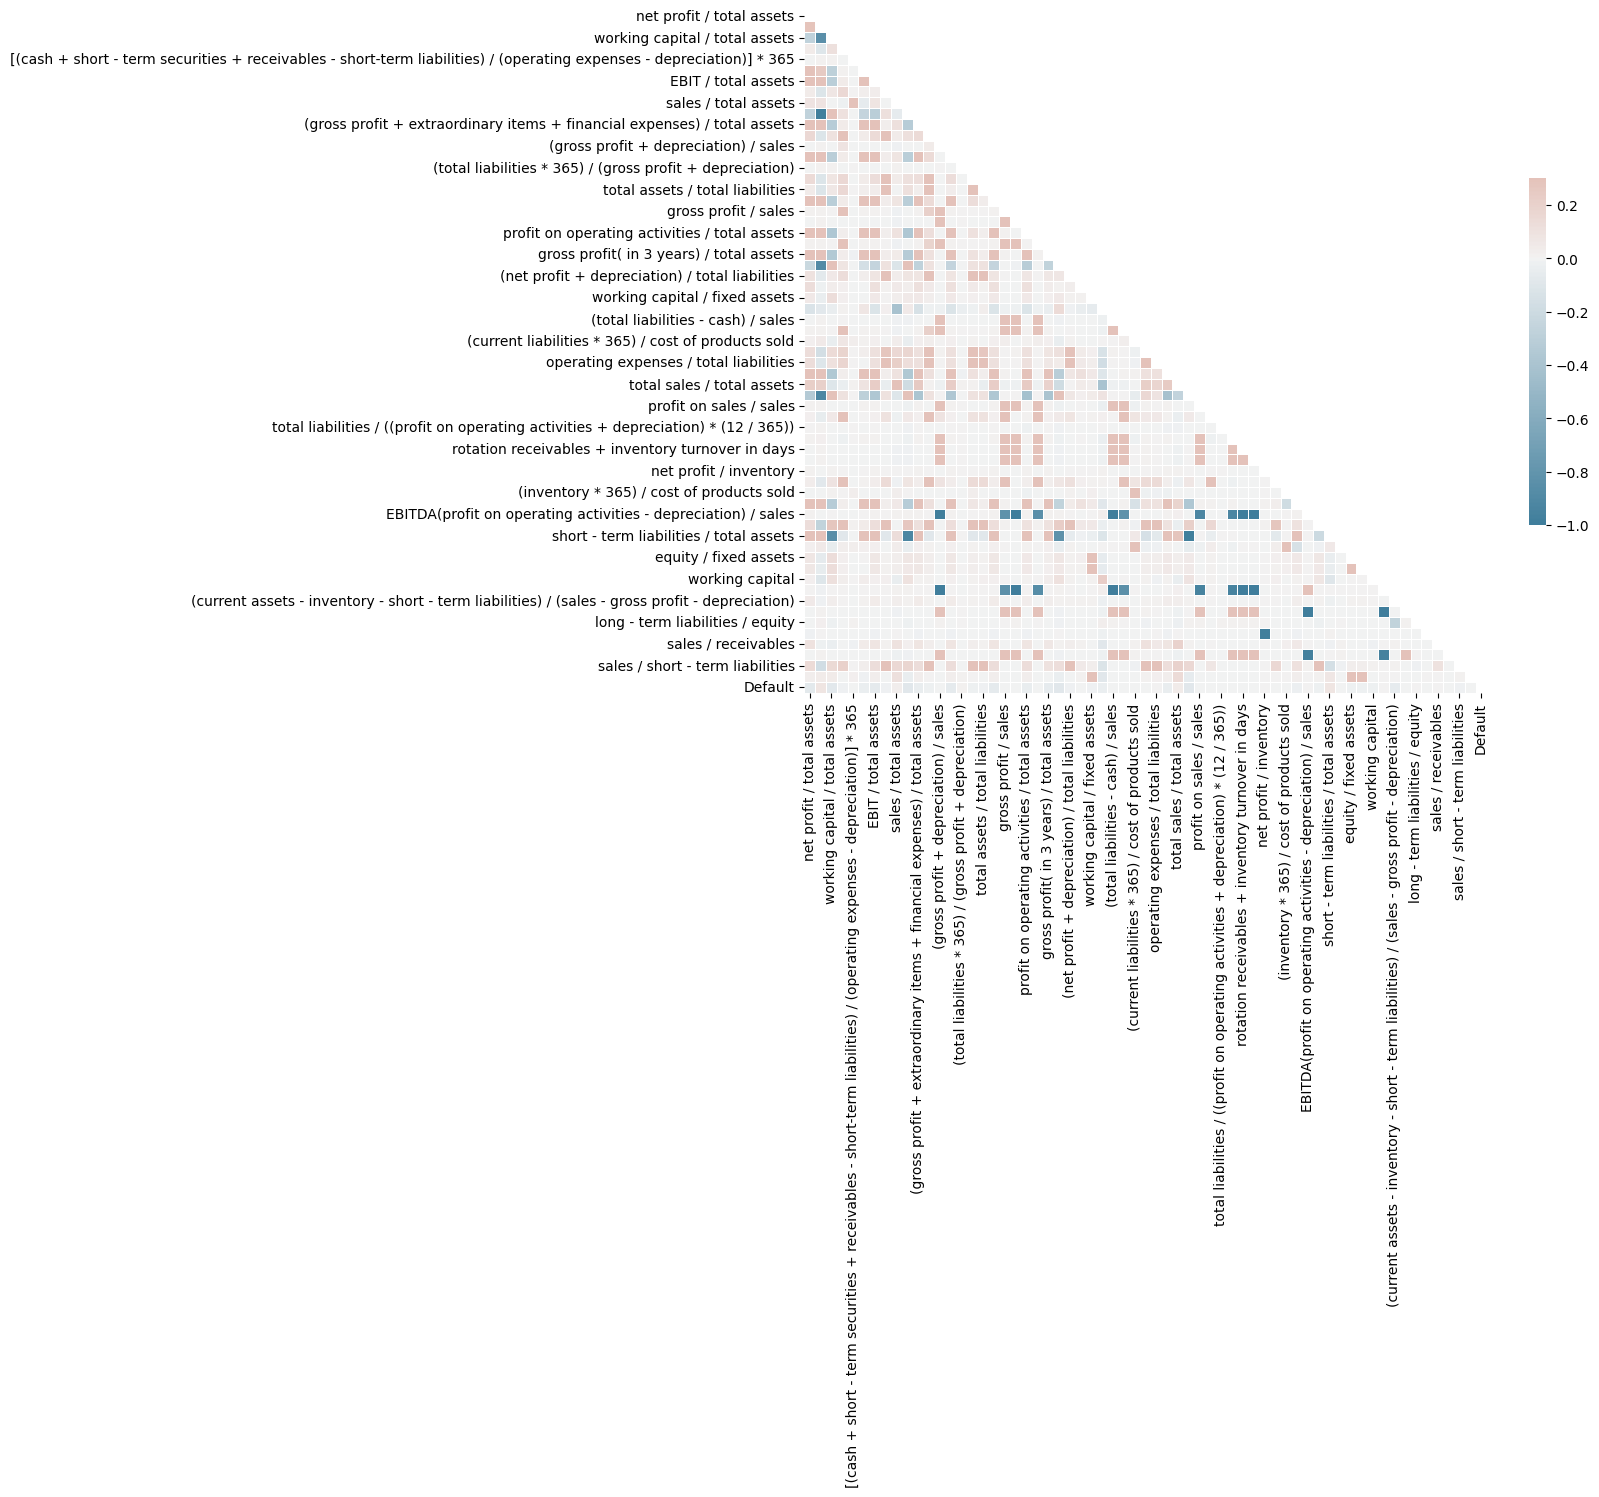

In [25]:
# Correlation study
data_corr = default_risk_dataset_no_na_feat_company_filtered.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data_corr, dtype=bool))
colormap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, 
            mask=mask, 
            cmap=colormap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}
            )

In [38]:
# Main conclusion
features_deleted = ['(current assets - inventories) / long - term liabilities',
                    'sales(n) / sales(n - 1)',
                    'total liabilities / total assets', 
                    '(gross profit + depreciation) / sales', 
                    'gross profit / sales',
                    '(inventory * 365) / sales', 
                    'net profit / sales',
                    '(total liabilities - cash) / sales',
                    '(gross profit + interest) / sales',
                    'constant capital / total assets', 
                    'profit on sales / sales',
                    'profit on operating activities / sales',
                    'rotation receivables + inventory turnover in days',
                    '(receivables * 365) / sales',
                    'net profit / inventory',
                    'EBITDA(profit on operating activities - depreciation) / sales',
                    '(sales - cost of products sold) / sales']

companies_deleted = [5395, 1900, 5334, 279, 1232, 75, 4472, 644, 5787, 5986, 3908, 2434, 
                     4422, 2499, 4516, 1815, 1814, 1677, 1715, 5913, 4556, 6293, 2616, 
                     2259, 6182, 177, 6950, 238, 1411, 5600, 82, 5283, 7005, 1417, 5914, 
                     6769, 267, 3261, 4605, 2679, 5432, 309, 5490, 1919, 1850, 3134, 4530, 
                     6844, 6921, 307, 3680, 4169, 5438, 6075, 2486, 6684, 4911, 2357, 
                     3898, 6346, 6683, 5223, 6102, 1155, 2939, 1179, 1412, 3455, 171, 2887, 
                     5811, 4463, 222, 3332, 2202, 6922, 2835, 3592, 2930, 2932, 2305, 6812, 
                     2938, 2615, 165, 6160, 2881, 2649, 1237, 1178, 6867, 1554, 1664, 4540, 
                     1713, 1749, 3394, 7000, 4131, 325, 560, 6758, 4027, 6851, 3770]